# [2. Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)

* [NLTK-Book-Resource Repository](https://github.com/BetoBob/NLTK-Book-Resource)
* [NLTK-Book-Resource Table of Contents](https://github.com/BetoBob/NLTK-Book-Resource#table-of-contents)

Run the cell below before running the examples.

In [71]:
import nltk

## 1.

☼ Create a variable `phrase` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [6]:
phrase = ["My", "phrase", "is", "this"]

In [8]:
# addition
phrase + ["one"]

['My', 'phrase', 'is', 'this', 'one']

In [9]:
# multiplication
phrase * 2

['My', 'phrase', 'is', 'this', 'My', 'phrase', 'is', 'this']

In [ ]:
# indexing
phrase[1]

In [13]:
# slicing
phrase[-2:]

['is', 'this']

In [18]:
# sorting
sorted(phrase)

['My', 'is', 'phrase', 'this']

## 2.

☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

* refer to section 1.2 for exploring Gutenberg corpus
* refer to Chapter 1, section 1.4 for **word types**

In [3]:
from nltk.corpus import gutenberg

ap = gutenberg.words('austen-persuasion.txt')

In [6]:
# number of tokens

len(ap)

98171

In [7]:
# number of word types (unique words)

len(set(ap))

6132

## 3.

☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [12]:
nltk.corpus.brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
nltk.corpus.webtext.words()

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

## 4

☼ Read in the texts of the *State of the Union addresses*, using the `state_union` corpus reader. Count occurrences of 'men', 'women', and 'people' in each document. What has happened to the usage of these words over time?

### Solution

This problem requires creating a **cumulative frequency diagram** (refer to *section 2*).

For this solution, I used `word.lower()` to account for occurances of upper-case letters at the beginning of some words.

In [33]:
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist(
    (docu, word.lower())
    for docu in state_union.fileids()
    for word in state_union.words(fileids=[docu]) if word.lower() in ["men", "women", "people"]
)

In [25]:
cfd.tabulate()

                       men people  women 
    1945-Truman.txt      2     10      2 
    1946-Truman.txt     12     49      7 
    1947-Truman.txt      7     12      2 
    1948-Truman.txt      5     22      1 
    1949-Truman.txt      2     15      1 
    1950-Truman.txt      6     15      2 
    1951-Truman.txt      8     10      2 
1953-Eisenhower.txt      3     17      0 
1954-Eisenhower.txt      2     15      0 
1955-Eisenhower.txt      4     26      0 
1956-Eisenhower.txt      2     30      2 
1957-Eisenhower.txt      5     11      2 
1958-Eisenhower.txt      2     19      1 
1959-Eisenhower.txt      4     11      1 
1960-Eisenhower.txt      2     10      0 
   1961-Kennedy.txt      6     10      0 
   1962-Kennedy.txt      6     10      2 
   1963-Johnson.txt      0      3      0 
   1963-Kennedy.txt      8     12      5 
   1964-Johnson.txt      3      3      1 
 1965-Johnson-1.txt      7     16      0 
 1965-Johnson-2.txt     12     14      3 
   1966-Johnson.txt     12     35 

### Advanced Solution

While `tabulate()` shows the general counts of each word, a graph would be a better way to visualize the change of word usage over time. Using `pandas` dataframes and some regular expressions (`re` library), a new table can be created with the speech year as the table's index rather than the name of the file. This can be graphed in order of year using `matplotlib`. 
* [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

In [71]:
import pandas as pd
import re

cfd_df = pd.DataFrame.from_dict(cfd, orient='index').rename_axis('speech').reset_index()
cfd_df['speech'] = cfd_df['speech'].apply(lambda x: int(re.search(r'\d{4}', x).group()))

cfd_df.set_index('speech')

,speech,people,men,women
0,1945,10,2.0,2.0
1,1946,49,12.0,7.0
2,1947,12,7.0,2.0
3,1948,22,5.0,1.0
4,1949,15,2.0,1.0
...,...,...,...,...
60,2002,14,3.0,6.0
61,2003,33,6.0,4.0
62,2004,21,7.0,8.0
63,2005,18,8.0,11.0


<Figure size 1152x432 with 0 Axes>

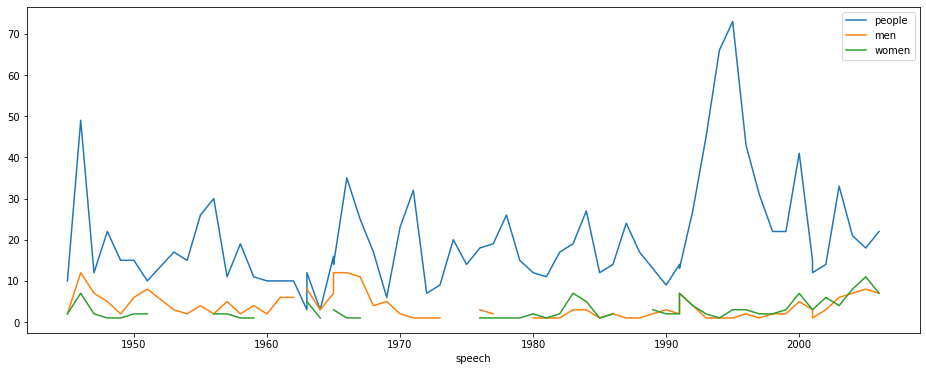

In [77]:
import matplotlib.pyplot as plt

cfd_df.set_index('speech').plot(figsize=(16,6))

## 5

☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: 
* `member_meronyms()`
* `part_meronyms()`
* `substance_meronyms()` 
* `member_holonyms()` 
* `part_holonyms()` 
* `substance_holonyms()`

### Solution

* refer to **Section 5.3 - More Lexical Relations**

In this example, I will use a different noun to demonstrate each type of lexical relationship. Note that the WordNet lexical relationships are a bit limited, so many words will have missing relationships that you might have expected them to have. For example, the noun 'house' does not have substance meronyms in WordNet despite being commonly built with materials such as wood and bricks. 

Remember that:
1. **meronyms** are items lower in a hierarchy
2. **holonyms** are items higher in a hierarchy

In [317]:
from nltk.corpus import wordnet as wn

In [358]:
wn.synsets('flour')

[Synset('flour.n.01'), Synset('flour.v.01'), Synset('flour.v.02')]

In [337]:
house_syn = wn.synset('body.n.01')

house_syn.definition()

'the entire structure of an organism (an animal, plant, or human being)'

* a **member** is a is component of a larger group of entities
* an example would be the relationships between a *country* and it's *states*
* *country* is higher in the hierarchy, be it's composed of many *states*

In [332]:
wn.synset('country.n.02').member_meronyms()

[Synset('department.n.02'), Synset('state.n.01')]

In [334]:
wn.synset('state.n.01').member_holonyms()

[Synset('country.n.02')]

* a **part** is a component of one entity
* for example, the *body* of an organism is comprised of many different organs
    * a *head*, which is part of a *body*, also has many parts like eyes and ears
    * we can continue moving down the hierarchy with various parts of each organ
* while a *skull* is part of a head, it can also be part of an entire *skeletal system*

In [338]:
wn.synset('body.n.01').part_meronyms()

[Synset('arm.n.01'),
 Synset('articulatory_system.n.01'),
 Synset('body_substance.n.01'),
 Synset('cavity.n.04'),
 Synset('circulatory_system.n.01'),
 Synset('crotch.n.02'),
 Synset('digestive_system.n.01'),
 Synset('endocrine_system.n.01'),
 Synset('head.n.01'),
 Synset('leg.n.01'),
 Synset('lymphatic_system.n.01'),
 Synset('musculoskeletal_system.n.01'),
 Synset('neck.n.01'),
 Synset('nervous_system.n.01'),
 Synset('pressure_point.n.01'),
 Synset('respiratory_system.n.01'),
 Synset('sensory_system.n.02'),
 Synset('torso.n.01'),
 Synset('vascular_system.n.01')]

In [341]:
wn.synset('head.n.01').part_meronyms()

[Synset('basilar_artery.n.01'),
 Synset('brain.n.01'),
 Synset('ear.n.01'),
 Synset('face.n.01'),
 Synset('muzzle.n.02'),
 Synset('skull.n.01'),
 Synset('temple.n.02')]

In [350]:
wn.synset('skull.n.01').part_holonyms()

[Synset('axial_skeleton.n.01'), Synset('head.n.01')]

Food nouns are an easy way to visualize **substance** relationships, because many food dishes are composed of several ingredients. For instance, a *pastery* generally uses *flour* as a base ingredient, although flour can be used as the basis for other foods like *bread*.

In [364]:
wn.synset('pastry.n.02').substance_meronyms()

[Synset('flour.n.01')]

In [359]:
wn.synset('flour.n.01').substance_holonyms()

[Synset('bread.n.01'), Synset('dough.n.01'), Synset('pastry.n.02')]

## 6

☼ In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

### Solution

1. you won't know where the translation came from (i.e. Was it a German translation or a Spanish translation?)
2. there might be some words that are spelled the same in German and in Spanish but have different meanings
    * in fact let's find out the overlaping words in German and Spanish using set theory
    * this is called the **intersection** of the two sets (as illustrated in a Ven Diagram below)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Venn0001.svg/1280px-Venn0001.svg.png" alt="intersection img"
	title="intersection img" width="300" height="200" />

In [103]:
from nltk.corpus import swadesh

de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English

# sets of each language
de2en_set = set([word_pair[0] for word_pair in de2en])
es2en_set = set([word_pair[0] for word_pair in es2en])

de2en_set & es2en_set   # this is the intersection (i.e. words found in both languages)

set()

There appears to be no overlap between the most popular German and Spanish words (at least in the top 200 most common words). However, lets see if there are any overlapping words in French and Italian, both of which are romance languages:

In [168]:
from nltk.corpus import swadesh

it2en = swadesh.entries(['it', 'en'])    # Italian-English
fr2en = swadesh.entries(['fr', 'en'])    # French-English

# sets of each language
it2en_set = set([word_pair[0] for word_pair in it2en])
fr2en_set = set([word_pair[0] for word_pair in fr2en])

it2en_set & fr2en_set   # this is the intersection (i.e. words found in both languages)

{'dire', 'là', 'sale'}

In [169]:
translate_it = dict(it2en)

translate_it['sale']

'salt'

In [170]:
translate_fr = dict(fr2en)

translate_fr['sale']

'dirty'

As you can see, the most common words in Italian and French have three overlapping words. The last word 'sale' has different translations depending on the language used.

To fix this, we need to say which language we are planning to translate in addition to the word we want to translate. That means we will need to change the key of each value to be a `(language, word)` pair before combining the dictionaries. This can be done using a list comprehension as shown below:

In [175]:
from nltk.corpus import swadesh

it2en = [(('it', word), trans) for (word, trans) in swadesh.entries(['it', 'en'])]    # Italian-English
fr2en = [(('fr', word), trans) for (word, trans) in swadesh.entries(['fr', 'en'])]    # French-English

translate = dict(it2en + fr2en)

In [177]:
translate[('it', 'sale')]

'salt'

In [176]:
translate[('fr', 'sale')]

'dirty'

## 7

☼ According to Strunk and White's Elements of Style, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) 

Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

### Solution

We can easily study the concordances of texts by converting any list of words into an NLTK text object. The news articles from the Brown Corpus will be used as an example.

In [179]:
from nltk.corpus import brown

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [184]:
news = nltk.Text(brown.words(categories='news'))

In [213]:
news.concordance("However")

Displaying 25 of 49 matches:
th governments '' . Merger proposed However , the jury said it believes `` thes
ment source told The Constitution , however , that Vandiver has not been consul
 to the election was not so quiet , however . It was marked by controversy , an
 . ( Some SEATO nations disagreed , however . ) There was the further complicat
icans . The Democratic leadership , however , hopes to pass it sometime this we
minor editing and clarification ; ; however , the first belief stood for entire
 your timing gets off '' . Moritz , however , kicks only about 10 or 12 extra p
 or pro-Yankee . The record books , however , would favor the Giants' ace . In 
 Van Brocklin's aerials . Skorich , however , is a strong advocate of a balance
standpoint of the army of duffers , however , this was easily the most hearteni
at stroke . Until a few weeks ago , however , Arnold Palmer was some god-like c
ainst teams in the other division . However , this would require a lengthening 
ro Beach , 

### Advanced Solution

*However* (oops), we are interested only in sentences that start with *However*. The concordance tool is not case sensitive, so it will not filter out upper and lower case h's. So we will need to manually remove entries that have *however* in the middle of the sentence. This can be accomplished by creating a list of concordances using the `.concordance_list` tool.

* [Forum post on NLTK concordance lists](https://stackoverflow.com/questions/47649987/how-to-save-nltk-concordance-results-in-a-list)

In [246]:
cl = news.concordance_list("however", lines=49)

In [247]:
cl[0]

ConcordanceLine(left=['operated', 'and', 'follow', 'generally', 'accepted', 'practices', 'which', 'inure', 'to', 'the', 'best', 'interest', 'of', 'both', 'governments', "''", '.', 'Merger', 'proposed'], query='However', right=[',', 'the', 'jury', 'said', 'it', 'believes', '``', 'these', 'two', 'offices', 'should', 'be', 'combined', 'to', 'achieve', 'greater', 'efficiency', 'and'], offset=233, left_print="th governments '' . Merger proposed", right_print=', the jury said it believes `` thes', line="th governments '' . Merger proposed However , the jury said it believes `` thes")

In [226]:
type(cl[0])

nltk.text.ConcordanceLine

In [223]:
cl[0].query

'However'

In [227]:
cl[0].line

"th governments '' . Merger proposed However , the jury said it believes `` thes"

We will need to remove all the `ConcordaneLine` objects that have a `.query` attribute of 'however'. This can be done using a list comprehension, and it can create a list of sentances as well.

In [248]:
[conLine.line for conLine in cl if conLine.query == "However"]

["th governments '' . Merger proposed However , the jury said it believes `` thes",
 'ainst teams in the other division . However , this would require a lengthening ',
 'ro Beach , Fla. , for the wedding . However , Mr. Parichy and his bride will go',
 ' admitted killing Mrs. Hengesbach . However , the confession , which was the on',
 'hat it was not in the Friday mail . However , three of the managers did say tha',
 "14 per cent over February's 2,963 . However , compared with March 1960 new car ",
 'fore the American Marketing Assn. . However , Peterson , president of Bell & Ho',
 "solution , naturally , is the bus . However , it's a half-mile walk down a stee",
 'acturers is hardly such a vehicle . However , one can argue that no such contro',
 'd to wait until the Congo grew up . However , the positions of all parties and ',
 'and appealed to Russia for help . ( However , there is little evidence that the',
 'nds have slipped a bit since then . However , in the same three-month peri

It looks like none of the instances of *However* in these sentences mean "to whatever extent". Although there is an example of this occurance when looking at the full brown corpus.

In [250]:
brownText = nltk.Text(brown.words())
brownText.concordance("however")

Displaying 25 of 552 matches:
th governments '' . Merger proposed However , the jury said it believes `` thes
ment source told The Constitution , however , that Vandiver has not been consul
 to the election was not so quiet , however . It was marked by controversy , an
 . ( Some SEATO nations disagreed , however . ) There was the further complicat
icans . The Democratic leadership , however , hopes to pass it sometime this we
minor editing and clarification ; ; however , the first belief stood for entire
 your timing gets off '' . Moritz , however , kicks only about 10 or 12 extra p
 or pro-Yankee . The record books , however , would favor the Giants' ace . In 
 Van Brocklin's aerials . Skorich , however , is a strong advocate of a balance
standpoint of the army of duffers , however , this was easily the most hearteni
at stroke . Until a few weeks ago , however , Arnold Palmer was some god-like c
ainst teams in the other division . However , this would require a lengthening 
ro Beach ,

In [252]:
cl = brownText.concordance_list("however", lines=552)
[conLine.line for conLine in cl if conLine.query == "However"][-1]

"nemesis haunting his footsteps '' . However one looks at it , therefore , I'd s"

## 8

◑ Define a conditional frequency distribution over the `Names corpus` that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

### Solution

* only one change needs to be made in the textbook's example
* instead of `name[-1]` (the last letter of a name) to `name[0]` (the first lett of a name)

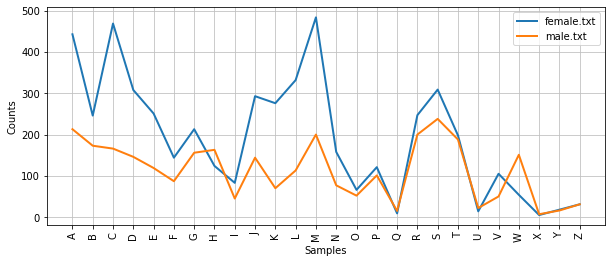

In [373]:
import matplotlib.pyplot as plt

# name data
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')

cfd = nltk.ConditionalFreqDist(
    (fileid, name[0]) 
    for fileid in names.fileids()
    for name in names.words(fileid))

plt.figure(figsize=(10, 4)) # optional; changes size of graph

cfd.plot()

## 9

◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in *Moby Dick* and in *Sense and Sensibility*?

### Solution

The `concordance` tool can be used to see the context of words used in a text.

In [ ]:
# run this if on Google Colab
nltk.download('book')

In [380]:
from nltk.book import text1, text2

In [391]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [392]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


It appears as though the word 'monstrous' in *Moby Dick* is an adjective to refer to the whale in the book. In *Sense and Sensibility*, it's an adjective to describe a stribg feeling of an adjective, like 'monstrous glad'. 

To compare the vocabulary richenss across texts, the `lexical_diversity` function can be used to compare the amount of unique words accross each text. (see section 3.2)

In [408]:
def lexical_diversity(text):
     return len(set(text)) / len(text)

In [409]:
lexical_diversity(text1)

0.07406285585022564

In [410]:
lexical_diversity(text2)

0.04826383002768831

## 10

◑ Read the BBC News article: [UK's Vicky Pollards 'left behind'](http://news.bbc.co.uk/1/hi/education/6173441.stm). The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

## 11

◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

## 12

◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

## 13

◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [67]:
from nltk.corpus import wordnet as wn

nouns = list(wn.all_synsets('n'))

len([n for n in nouns if len(n.hyponyms()) == 0]) / len(nouns)

0.7967119283931072

## 14

◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [57]:
from nltk.corpus import wordnet as wn

def supergloss(s):
    
    hypers = car_syn.hypernyms()
    hypos = car_syn.hyponyms()
    
    hyper_defs = ["    " + h.lemmas()[0].name() + ": " + h.definition() + "\n" for h in hypos]
    hypo_defs = ["    " + h.lemmas()[0].name() + ": " + h.definition() + "\n" for h in hypers]
    
    word_string = s.lemmas()[0].name() + ": " + s.definition() + "\n"
    hypo_string = "hyponyms: \n" + ''.join(hyper_defs)
    hyper_string = "hypernyms: \n" + ''.join(hypo_defs)
    
    return word_string + "\n" + hyper_string + "\n" + hypo_string

In [58]:
car_syn = wn.synset('car.n.01')

print(supergloss(car_syn))

car: a motor vehicle with four wheels; usually propelled by an internal combustion engine

hypernyms: 
    motor_vehicle: a self-propelled wheeled vehicle that does not run on rails

hyponyms: 
    ambulance: a vehicle that takes people to and from hospitals
    beach_wagon: a car that has a long body and rear door with space behind rear seat
    bus: a car that is old and unreliable
    cab: a car driven by a person whose job is to take passengers where they want to go in exchange for money
    compact: a small and economical car
    convertible: a car that has top that can be folded or removed
    coupe: a car with two doors and front seats and a luggage compartment
    cruiser: a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
    electric: a car that is powered by electricity
    gas_guzzler: a car with relatively low fuel efficiency
    hardtop: a car that resembles a convertible but has a fixed rigid top
    hatchback: a car

## 15.

◑ Write a program to find all words that occur at least three times in the Brown Corpus.

In [81]:
from nltk.corpus import brown

cfd = nltk.FreqDist(brown.words())
words = [w for w in cfd.keys() if cfd[w] >= 3]

print(len(words))
print(len(brown.words()))

22339
1161192


## 16.

◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (`nltk.corpus.brown.categories()`). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

### Solution

A list of tuples containing the genre and it's corresponding lexical diversity scores can be created by using a list comprehension.

In [91]:
def lexical_diversity(text):
     return len(text) / len(set(text))
    
cats = nltk.corpus.brown.categories()
brown_lex_table = [(c, lexical_diversity(brown.words(categories=c))) for c in cats]

In [92]:
brown_lex_table

[('adventure', 7.814063556457065),
 ('belles_lettres', 9.396666847619565),
 ('editorial', 6.22891809908999),
 ('fiction', 7.362717695119329),
 ('government', 8.570712626818237),
 ('hobbies', 6.899455383326351),
 ('humor', 4.324297388877816),
 ('learned', 10.788777507562726),
 ('lore', 7.60525408536165),
 ('mystery', 8.188054998567745),
 ('news', 6.98582742809504),
 ('religion', 6.182174799937235),
 ('reviews', 4.718757245536749),
 ('romance', 8.284666351159489),
 ('science_fiction', 4.475719146303742)]

With a [lambda function](https://realpython.com/python-lambda/) and python built-ins **min** and **max**, the genere with the minimum and maximum lexical diversity can be found:

In [95]:
min(brown_lex_table, key = lambda x : x[1])

('humor', 4.324297388877816)

In [96]:
max(brown_lex_table, key = lambda x : x[1])

('learned', 10.788777507562726)

## 17.

◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

### Solution

This function will take in an NLTK corpus or NLTK Text object and return the top 50 most occuring words that are not stop words.

In [121]:
from nltk.corpus import stopwords

def top50_nonstop(text):
    
    stops = stopwords.words('english')
    text_words = text.words()

    non_stops = [word.lower() for word in text_words if word.lower() not in stops]
    
    return nltk.FreqDist(non_stops).most_common(50)

In [120]:
from nltk.corpus import movie_reviews

top50_nonstop(movie_reviews)

[(',', 77717),
 ('.', 65876),
 ("'", 30585),
 ('"', 17612),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('?', 3771),
 ('like', 3690),
 (':', 3042),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906),
 ('characters', 1859),
 (';', 1850),
 ('first', 1836),
 ('--', 1815),
 ('see', 1749),
 ('!', 1713),
 ('way', 1693),
 ('make', 1642),
 ('life', 1586),
 ('really', 1558),
 ('films', 1536),
 ('plot', 1513),
 ('little', 1501),
 ('people', 1455),
 ('could', 1427),
 ('scene', 1397),
 ('man', 1396),
 ('bad', 1395),
 ('never', 1374),
 ('best', 1333),
 ('new', 1292),
 ('scenes', 1274),
 ('many', 1268),
 ('director', 1237),
 ('know', 1217),
 ('movies', 1206)]

## 18.

◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

### Solution

It may be tempting to reuse most of the code from exercise 17 by creating a set of bigrams from a list without stop words. There are however two problems with this:

1. a false bigram might be created when two words are between a stop word
    * ex: the phrase "started the engine" would turn into (started, engine)
2. the end of one text file and the begining of another text file cannot be a bigram because they are unrelated to each other

This means extra steps will need to be taken in order to collect the bigrams of each individual review, combine them and then filter out stop words before determining the top 50 most common bigrams in the review set.

In [159]:
from nltk.corpus import stopwords

def top50_bigrams_nonstop(text):
    
    stops = stopwords.words('english')
    
    text_bigrams = [list(nltk.bigrams([w.lower() for w in text.words(file_id)])) for file_id in text.fileids()]
    
    text_bigrams_combined = sum(text_bigrams, [])
    
    nonstop_bigrams = [(l, r) for (l, r) in text_bigrams_combined 
                       if l not in stops and r not in stops]
    
    return nltk.FreqDist(nonstop_bigrams).most_common(50)

In [160]:
from nltk.corpus import movie_reviews

top50_bigrams_nonstop(movie_reviews)

[((')', ','), 3498),
 (('.', '.'), 2948),
 ((',', '"'), 2308),
 ((')', '.'), 2299),
 (('.', '"'), 1854),
 (('film', ','), 1277),
 (('film', '.'), 1118),
 (('however', ','), 872),
 (('movie', '.'), 802),
 (('movie', ','), 659),
 (('film', "'"), 583),
 (('.', ')'), 535),
 (('"', ')'), 530),
 (('.', 'however'), 508),
 (('well', ','), 495),
 (('.', '('), 462),
 (('.', 'one'), 459),
 (('"', ','), 453),
 (('"', '.'), 408),
 (('course', ','), 391),
 ((',', 'however'), 389),
 (('special', 'effects'), 382),
 ((',', 'even'), 368),
 ((',', 'though'), 368),
 (('time', '.'), 360),
 (('.', 'even'), 346),
 (('time', ','), 336),
 (('mr', '.'), 319),
 (('fact', ','), 318),
 (('*', '*'), 313),
 (('!', '"'), 311),
 (('.', 'although'), 308),
 (('"', '('), 290),
 ((',', 'one'), 290),
 ((',', 'especially'), 277),
 ((',', 'like'), 275),
 ((',', 'although'), 274),
 (('unfortunately', ','), 274),
 (('life', '.'), 270),
 (('?', '"'), 270),
 (('story', '.'), 267),
 (('(', '"'), 264),
 (('.', 'unfortunately'), 26

## 19.

◑ Write a program to create a table of word frequencies by genre, like the one given in section 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

## 20.

◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

# 21.

◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

## 22.

◑ Define a function `hedge(text)` which processes a text and produces a new version with the word 'like' between every third word.

In [30]:
def hedge(text):
    words = nltk.word_tokenize(text)
    like_words = []

    for index in range(len(words)):
        if (index % 3 == 0 and index != 0):
            like_words.append("like")
        like_words.append(words[index])
    
    return like_words

In [31]:
test = "This is a test text one two three check"

hedge(test)

['This',
 'is',
 'a',
 'like',
 'test',
 'text',
 'one',
 'like',
 'two',
 'three',
 'check']

## 23.

★ Zipf's Law: Let *f(w)* be the frequency of a word *w* in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. *f × r = k*, for some constant *k*). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
    
1. Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
2. Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to `import random` first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

## 24.

★ Modify the text generation program in 2.2 further, to do the following tasks:

1. Store the n most likely words in a list words then randomly choose a word from the list using `random.choice()`. (You will need to `import random` first.)
2. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
3. Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.


## 25. 

★ Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

### Solution

1. Use a list comprehension to create a list of language files that end in `Latin1`
2. Use a list comprehension to find a word is in the UDHR of a particular language
    * **Note:** this solution is case-sensitive

In [67]:
def find_language(word):
    
    latin_langs = [lang for lang in nltk.corpus.udhr.fileids() if lang.endswith("Latin1")]

    return [lang[:-7] for lang in latin_langs if word in nltk.corpus.udhr.words(lang)]

In [71]:
find_language("the")

['English', 'Paez', 'Yao']

## 26.

★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.

## 27.

★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

## 28.

★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.